In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
path = "UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
100_0_0_20170112213500903.jpg.chip.jpg


In [3]:
 base_path = "UTKFace/"

In [4]:
import cv2
images = []
ages = []
genders = []
for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )

Gender: 0 Age: 14


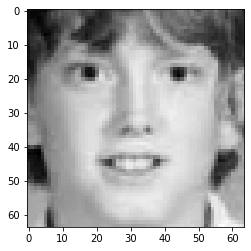

In [18]:
import matplotlib.pyplot as plt
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 500
sample = images[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
display(sample)

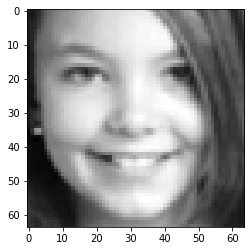

In [19]:
# pre processing
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = int(ages[i])
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(features[550])

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


In [21]:
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

In [24]:
inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)


In [25]:
model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [11]:
h = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data=(x_test,[y_test[:,0],y_test[:,1]]),epochs = 25, batch_size=128,shuffle = True)

Train on 18966 samples, validate on 4742 samples
Epoch 1/25
18966/18966 [==============================] - 47s 2ms/step - loss: 641.3525 - dense_4_loss: 639.7619 - dense_10_loss: 0.7173 - dense_4_accuracy: 0.0157 - dense_10_accuracy: 0.5076 - val_loss: 284.0701 - val_dense_4_loss: 285.0737 - val_dense_10_loss: 0.6927 - val_dense_4_accuracy: 0.0293 - val_dense_10_accuracy: 0.5190
Epoch 2/25
18966/18966 [==============================] - 33s 2ms/step - loss: 397.0333 - dense_4_loss: 396.3408 - dense_10_loss: 0.6927 - dense_4_accuracy: 0.0207 - dense_10_accuracy: 0.5226 - val_loss: 262.0083 - val_dense_4_loss: 260.6554 - val_dense_10_loss: 0.6926 - val_dense_4_accuracy: 0.0297 - val_dense_10_accuracy: 0.5190
Epoch 3/25
18966/18966 [==============================] - 34s 2ms/step - loss: 336.0489 - dense_4_loss: 335.2068 - dense_10_loss: 0.6922 - dense_4_accuracy: 0.0256 - dense_10_accuracy: 0.5215 - val_loss: 191.5988 - val_dense_4_loss: 192.4022 - val_dense_10_loss: 0.6925 - val_dense_4_a

18966/18966 [==============================] - 33s 2ms/step - loss: 181.5126 - dense_4_loss: 180.3267 - dense_10_loss: 0.6920 - dense_4_accuracy: 0.0321 - dense_10_accuracy: 0.5236 - val_loss: 109.2494 - val_dense_4_loss: 111.0506 - val_dense_10_loss: 0.6925 - val_dense_4_accuracy: 0.0441 - val_dense_10_accuracy: 0.5190


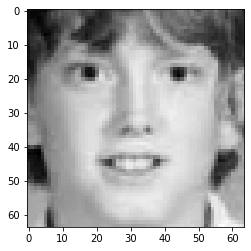

Actual Gender: Male Age: 14
Values: [array([[14.48307]], dtype=float32), array([[0.47633]], dtype=float32)] 
Predicted Gender: Male Predicted Age: [[14.48307]]


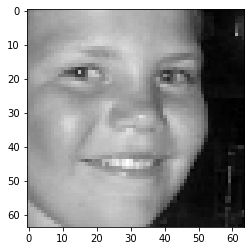

Actual Gender: Male Age: 10
Values: [array([[18.773794]], dtype=float32), array([[0.47633]], dtype=float32)] 
Predicted Gender: Male Predicted Age: [[18.773794]]


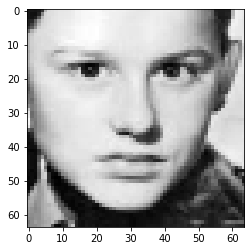

Actual Gender: Male Age: 10
Values: [array([[12.298637]], dtype=float32), array([[0.47633]], dtype=float32)] 
Predicted Gender: Male Predicted Age: [[12.298637]]


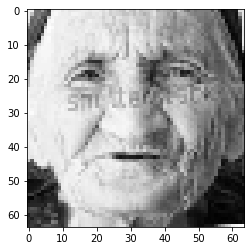

Actual Gender: Female Age: 100
Values: [array([[71.71234]], dtype=float32), array([[0.47633]], dtype=float32)] 
Predicted Gender: Male Predicted Age: [[71.71234]]


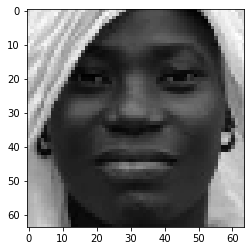

Actual Gender: Female Age: 24
Values: [array([[24.743338]], dtype=float32), array([[0.47633]], dtype=float32)] 
Predicted Gender: Male Predicted Age: [[24.743338]]


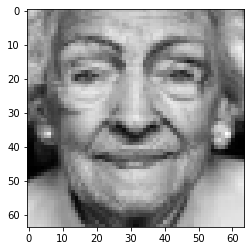

Actual Gender: Female Age: 100
Values: [array([[76.264305]], dtype=float32), array([[0.47633]], dtype=float32)] 
Predicted Gender: Male Predicted Age: [[76.264305]]


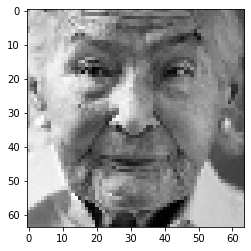

Actual Gender: Female Age: 100
Values: [array([[70.67904]], dtype=float32), array([[0.47633]], dtype=float32)] 
Predicted Gender: Male Predicted Age: [[70.67904]]


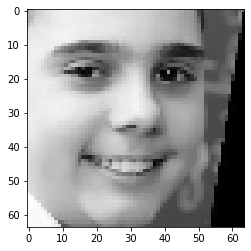

Actual Gender: Male Age: 12
Values: [array([[13.094393]], dtype=float32), array([[0.47633]], dtype=float32)] 
Predicted Gender: Male Predicted Age: [[13.094393]]


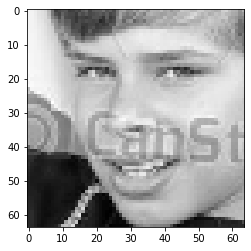

Actual Gender: Male Age: 10
Values: [array([[18.166435]], dtype=float32), array([[0.47633]], dtype=float32)] 
Predicted Gender: Male Predicted Age: [[18.166435]]


In [13]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
    
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-80"
    if distr >= 3.65 and distr <= 4.4:return "80 +"
    return "Unknown"
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )    
    age = val[0]
    gender = get_gender(val[1])
    print("Values:",val,"\nPredicted Gender:",gender,"Predicted Age:",age)
    
    
indexes = [500,59,80,2,4546,7,9,256,45]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)